# GARCH Model Analysis for NIFTY

- Import required packages
- dateteime for np array
- pandas for dataframe type
- arch model for GARCH
- statsmodel to plot ACF and PACF
- nump for GARCH model work on the data

In [151]:
from datetime import datetime, timedelta
import pandas as pd
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

Import matplotlib to plot the charts. Use the values in plt.rcParams to configure the chart size

In [152]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

## Import file
Input file name. Change nifty_index_ts.csv to any other csv file. Make sure that the file has date, price, pct_ret and log_ret

In [184]:
f = 'nifty_index_ts.csv'

Using pandas, read csv. index_col will set the date column as index, so it is easier to work with the dates

In [185]:
df = pd.read_csv(f, parse_dates=True, index_col='date')

Convert the date index to datetime data type

In [186]:
df.index = pd.to_datetime(df.index)

Create 3 sets based on the dates. Assign them pre_df, post_df, full_df

In [187]:
pre_df = df[(df.index >= '1998-01-01') & (df.index <= '2000-05-12')]
post_df = df[(df.index >= '2000-07-12') & (df.index <= '2002-12-31')]
full_df = df[(df.index >= '1998-01-01') & (df.index <= '2002-12-31')]

Take just the log_ret column and date (by default, since it is an index). You can change .log_ret to pct_ret for normal returns

In [188]:
pre_df_log_ret = pre_df.log_ret
post_df_log_ret = post_df.log_ret
full_df_log_ret = full_df.log_ret

Describe the dataframe for each of the 3 sets.

In [195]:
pre_df_log_ret.describe()

count    617.000000
mean       0.000280
std        0.019202
min       -0.073585
25%       -0.009505
50%        0.000000
75%        0.010343
max        0.076276
Name: log_ret, dtype: float64

In [196]:
post_df_log_ret.describe()

count    645.000000
mean      -0.000509
std        0.013939
min       -0.063095
25%       -0.007580
50%        0.000000
75%        0.007070
max        0.059960
Name: log_ret, dtype: float64

In [197]:
full_df_log_ret.describe()

count    1304.000000
mean        0.000010
std         0.016673
min        -0.073585
25%        -0.008291
50%         0.000000
75%         0.008826
max         0.076276
Name: log_ret, dtype: float64

## Plot Charts for returns

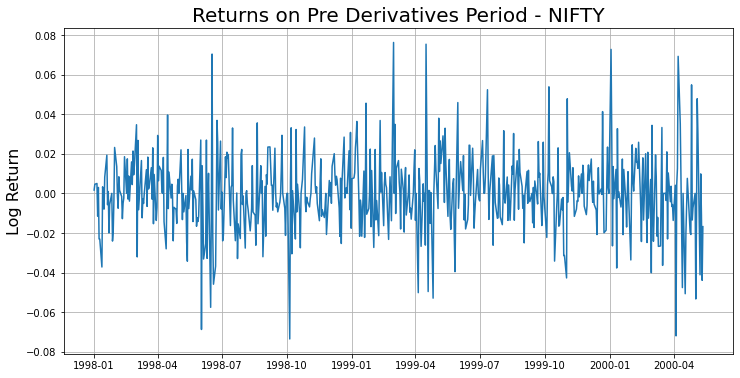

In [189]:
plt.plot(pre_df_log_ret)
plt.ylabel('Log Return', fontsize=16)
plt.title('Returns on Pre Derivatives Period - NIFTY', fontsize=20)
plt.grid(axis='both')

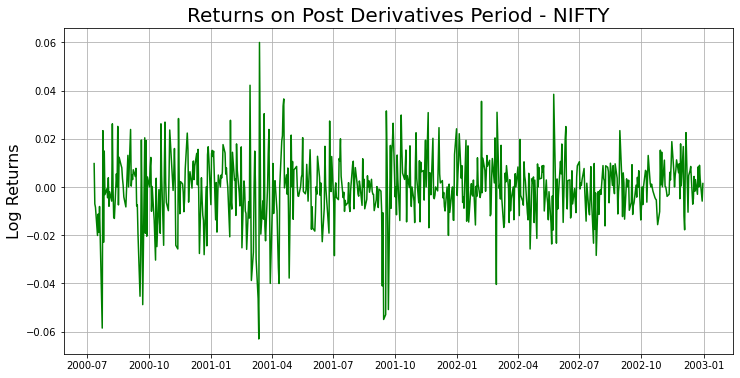

In [158]:
plt.plot(post_df_log_ret, 'g')
plt.ylabel('Log Returns', fontsize=16)
plt.title('Returns on Post Derivatives Period - NIFTY', fontsize=20)
plt.grid(axis='both')

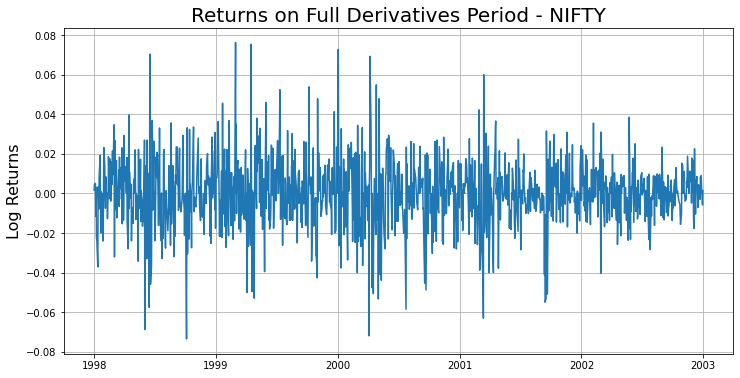

In [159]:
"""
plt.plot(full_df_log_ret)
plt.ylabel('Log Returns', fontsize=16)
plt.title('Returns on Full Derivatives Period - NIFTY', fontsize=20)
plt.grid(axis='both')
"""

## Combine log returns from all three sets and plot

Text(0.5, 1.0, 'Returns on Pre, Post and Full Derivatives Period - NIFTY')

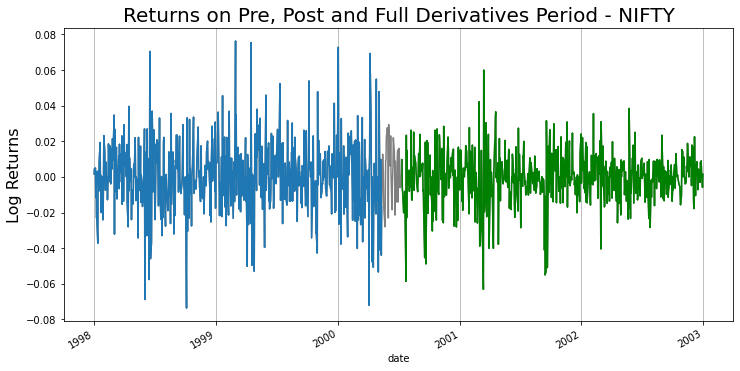

In [183]:
full_df.log_ret.plot(color='grey')
pre_df.log_ret.plot()
post_df.log_ret.plot(color='green')
plt.grid(axis='x')
plt.ylabel('Log Returns', fontsize=16)
plt.title('Returns on Pre, Post and Full Derivatives Period - NIFTY', fontsize=20)

## Plot PACF and ACF for the full set

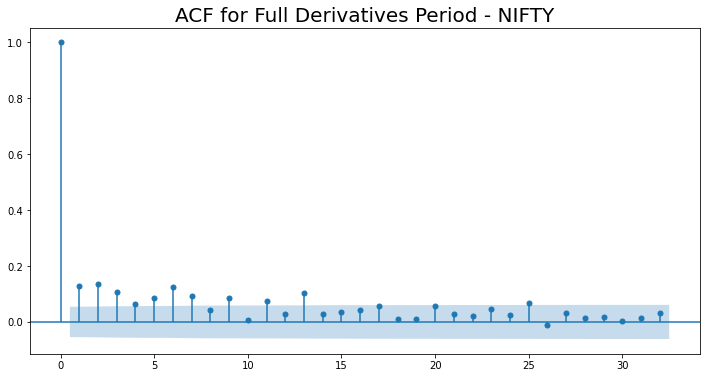

In [192]:
plot_acf(full_df.log_ret**2)
plt.title('ACF for Full Derivatives Period - NIFTY', fontsize=20)
plt.show()

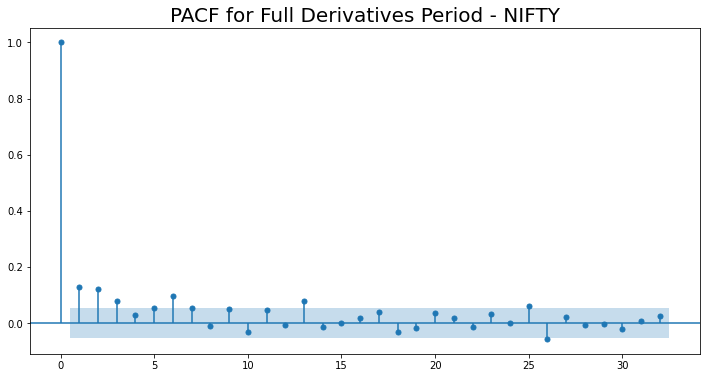

In [194]:
plot_pacf(full_df.log_ret**2)
plt.title('PACF for Full Derivatives Period - NIFTY', fontsize=20)
plt.show()

## Create the GARCH model for the three sets

In [162]:
pre_model = arch_model(pre_df_log_ret, p=1, q=1, rescale=True)
pre_model_fit = pre_model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2745.297447224776
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1365.263392781932
Iteration:      3,   Func. Count:     20,   Neg. LLF: 237467108.14512345
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1307.0297332863138
Iteration:      5,   Func. Count:     33,   Neg. LLF: 1272.73232239685
Iteration:      6,   Func. Count:     40,   Neg. LLF: 1260.749246937965
Iteration:      7,   Func. Count:     46,   Neg. LLF: 1260.7465843055456
Iteration:      8,   Func. Count:     51,   Neg. LLF: 1260.7465827243327
Iteration:      9,   Func. Count:     55,   Neg. LLF: 1260.7465827239434
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1260.7465827243327
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9


In [163]:
post_model = arch_model(post_df_log_ret, p=1, q=1, rescale=True)
post_model_fit = post_model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3594.8718976822825
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2552572585.5482054
Iteration:      3,   Func. Count:     22,   Neg. LLF: 185806387.2308123
Iteration:      4,   Func. Count:     28,   Neg. LLF: 1080.9729921059077
Iteration:      5,   Func. Count:     35,   Neg. LLF: 1080.4488602850722
Iteration:      6,   Func. Count:     41,   Neg. LLF: 1075.1307780379138
Iteration:      7,   Func. Count:     46,   Neg. LLF: 1075.1307628828024
Iteration:      8,   Func. Count:     51,   Neg. LLF: 1075.1307622924471
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1075.1307622924471
            Iterations: 8
            Function evaluations: 51
            Gradient evaluations: 8


In [164]:
full_model = arch_model(full_df_log_ret, p=1, q=1, rescale=True)
full_model_fit = full_model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7518.692031911432
Iteration:      2,   Func. Count:     16,   Neg. LLF: 362530066226.5847
Iteration:      3,   Func. Count:     24,   Neg. LLF: 2639.24933115469
Iteration:      4,   Func. Count:     32,   Neg. LLF: 2940.5353357069316
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2428.9447774838372
Iteration:      6,   Func. Count:     44,   Neg. LLF: 2428.9293339237233
Iteration:      7,   Func. Count:     49,   Neg. LLF: 2428.927392890562
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2428.9272466501825
Iteration:      9,   Func. Count:     59,   Neg. LLF: 2428.9272438807798
Iteration:     10,   Func. Count:     63,   Neg. LLF: 2428.927243880769
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2428.9272438807798
            Iterations: 10
            Function evaluations: 63
            Gradient evaluations: 10


## For each of the three sets, show summary

In [165]:
pre_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                log_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1260.75
Distribution:                  Normal   AIC:                           2529.49
Method:            Maximum Likelihood   BIC:                           2547.19
                                        No. Observations:                  617
Date:                Sat, Dec 18 2021   Df Residuals:                      616
Time:                        12:31:47   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0974  7.274e-02      1.339      0.181 [-4.519e-02,  0.240]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2685      0.132      2.037  4.166e-02  [1.014e-02,  0.527]
alpha[1]       0.0773  4.267e-02      1.812  6.993e-02 [-6.300e-03,  0.161]
beta[1]        0.8474  6.164e-02     13.746  5.377e-43    [  0.727,  0.968]
===========================================================================

Covariance estimator: robust
"""

In [166]:
post_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                log_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1075.13
Distribution:                  Normal   AIC:                           2158.26
Method:            Maximum Likelihood   BIC:                           2176.14
                                        No. Observations:                  645
Date:                Sat, Dec 18 2021   Df Residuals:                      644
Time:                        12:31:47   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0304  4.914e-02      0.619      0.536 [-6.587e-02,  0.127]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2009  9.410e-02      2.135  3.275e-02 [1.648e-02,  0.385]
alpha[1]       0.1839  5.166e-02      3.561  3.695e-04 [8.270e-02,  0.285]
beta[1]        0.7156  8.595e-02      8.325  8.399e-17   [  0.547,  0.884]
==========================================================================

Covariance estimator: robust
"""

In [167]:
full_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                log_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2428.93
Distribution:                  Normal   AIC:                           4865.85
Method:            Maximum Likelihood   BIC:                           4886.55
                                        No. Observations:                 1304
Date:                Sat, Dec 18 2021   Df Residuals:                     1303
Time:                        12:31:47   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0562  4.017e-02      1.399      0.162 [-2.253e-02,  0.135]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1306  4.732e-02      2.759  5.790e-03 [3.783e-02,  0.223]
alpha[1]       0.1350  3.000e-02      4.502  6.747e-06 [7.624e-02,  0.194]
beta[1]        0.8249  3.580e-02     23.044 1.709e-117   [  0.755,  0.895]
==========================================================================

Covariance estimator: robust
"""